#Book Ratings prediction

The aim of this project is to predict what readers will rate the books that a certain company will publish in 2018. We have the data from 2017, where we know what readers read and what rating each user provided on $\textbf{average}$ to all books they read. So, I will use linear regression to predict the average rating for books in 2018, which will be using the books read in 2017 + books that will be read in 2018.

In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt #plots 
import os 
%matplotlib inline 

#folder = '../input/'

#os.listdir(folder)


In [13]:
# reading the data
user = pd.read_csv("~/Desktop/unsw/Projects/Datathon_2018/Dataset/User Data.csv")

In [14]:
user.head()

,User ID,User Difficulty Choice,User Read Books (2017),User Read Books (2018),Average Rating (2017)
0,ID790145788,1,6254,7180,3.115447
1,ID646234447,Not specified,"5854, 5676, 7265, 6051","5729, 5279, 6242, 5519, 5251",3.157876
2,ID86918707,5,5815,"6372, 6697",1.512284
3,ID404262345,2,"6969, 7002, 5761","5023, 6412, 6124",3.641681
4,ID267634255,4,"7908, 7585, 7655, 5013, 5352, 7753, 5793","7915, 7884, 7404, 6022, 6589, 6543, 5450, 6848",2.506743


Now we check the shape of the dataframe to see how many users we have data for.

In [23]:
user.shape

(10000, 5)

So we know that we have data for 10000 users.

Now I will check the range of values that 'User Difficulty Choice' variable can take:

In [15]:
# checking input values of 'User Difficulty Choice'
user['User Difficulty Choice'].value_counts(dropna=False)

Not specified    1936
1                1653
3                1637
5                1601
2                1601
4                1572
Name: User Difficulty Choice, dtype: int64

In this dataset, the columns represent the following:

1) User ID - unique ID 

2) User Difficulty Choice - difficulty level of books that this specific user enjoys reading (it goes from 1-4)

3) User Read Books (2017) - list of books that each user read in 2017 (each book is represented by a number which is the book ID) 

4) User Read Books (2018) - list of books ID that each user inted to read in 2018

5) Average Rating (2017)- Average rating for all books read by the user in 2017

In [16]:
# assigning 'Average Rating (2017)' to be the response variable
y = user['Average Rating (2017)']

Since the 'User Read Books (2017)' column stores many different books for each user, we need to split the list of books for each user into different columns so that each book ID will have its own column.

In [21]:
books2017 = user['User Read Books (2017)']

# splitting the books ID for each user in a list
splits2017 = books2017.str.split(', ')

# number of books that each user read in 2017 
n2017 = splits2017.str.len()

In order to calculate the average of book ratings, we need to sum up all the books rating for a given user and divide it by the number of books that this person read:

$\frac{\sum{book_i}}{n}$

So we do:

$\frac{\sum{book_i}}{n}n$

to get the sum of of the books rating that the user read.

In [22]:
# sum of books rating for each user
Y = y*n2017

Now, create a column for each book and we assign 1 if the given user has read this book or 0 if he has not. 

Then we will run a linear regression on the following way:

$Y_{user1} = \beta_{0}x_{user1} + \beta_{book1}x_{user1} + ... + \beta_{lastbook}x_{user1}$

.

.

.

$Y_{user10000} = \beta_{0}x_{user10000} + \beta_{book1}x_{user10000} + ... + \beta_{lastbook}x_{user10000}$


And after running the linear regression we will get the $\beta's$ for each book, and hence, we get an approximation of the rating that a random person give for each book.

Following, we can just calculate the average booking rates for 2018 for each user by using these books rating that we got.

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

# we use CountVectorizer to convert the collection of books read in 2017 to a matrix of token counts
counter = CountVectorizer()
counter

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [25]:
# we let lowercase=False becase we dont want to let the CountVectorizer to convert all characters to lowercase
counter = CountVectorizer(lowercase=False, tokenizer= lambda x: x)

In [27]:
# Learn a vocabulary dictionary of all tokens in the raw documents
counter.fit(splits2017)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function <lambda> at 0x11846ed90>, vocabulary=None)

In [33]:
#Learn the vocabulary dictionary and return term-document matrix
# we use .todense() to indicate that we want most of the values on the matrix to be non-zero
bagwords2017 = counter.transform(splits2017).todense()

Now we check how many books there are by looking at how many columns of different tokens were created:

In [31]:
bagwords2017.shape

(10000, 3000)

From that we see that there are 3000 different books.

In [32]:
from scipy.sparse import csr_matrix

We will create a sparse matrix from the bag of words matrix. It will reduce memory usage since it compacts the matrix
with mostly zero entries.

In [35]:
#create a sparse matrix
csr_matrix(bagwords2017)

<10000x3000 sparse matrix of type '<class 'numpy.int64'>'
	with 25919 stored elements in Compressed Sparse Row format>

In [36]:
X = csr_matrix(bagwords2017)

In [37]:
from sklearn.linear_model import LinearRegression

# creating a linear regression
model = LinearRegression()

# fitting the linear regression where 
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now we want to check how good our model for prediction was, so we predict from the model that we created
then we plot to see the relationship:

In [38]:
# predicting from the model
preds = model.predict(bagwords2017)

Now we plot to see the results:

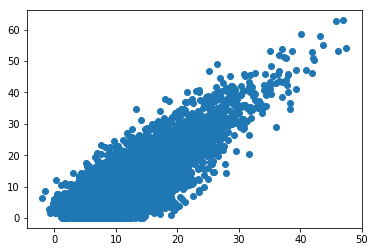

In [39]:
plt.scatter(preds, Y)

From the plot we can see that this prediction is not good, since the range for predicted values is very large.

Now we add a new column for each user bias which will be Identity matrix 

In [40]:
X = np.hstack((
    bagwords2017,
    np.eye(len(user))
))

In [41]:
from scipy.sparse import csr_matrix

# creating a new sparse matrix from the matrix X with the user bias term added
newX = csr_matrix(X)

And then we predict and plot to see if we get better results:

In [43]:
# fitting the model
model.fit(newX, Y)

# predicting values from the model
preds = model.predict(newX)

Now the we fitted the model again, we plot the results:

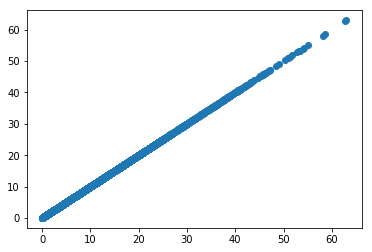

In [45]:
# plotting the predictive model
plt.scatter(preds, Y)

The plot shows a straight line because we have added the user bias. So the predictive model works as expected since it is more accurate.

Now we want to do the same thing for 'User Read Books (2018)' and we will use the predictive model that we created for 2017 to predict the average ratings for 2018.

Then we will use the following formula to calculate the average rating for 2018:

$\frac{\sum{ratings_{2017}} + \sum{ratings_{2018}}}{total}$

where total = number of books read in 2017 + number of books read in 2018

We already have the the $\sum{ratings_{2017}}$ which is the Y values calculated before, we also have $n_{books2017}$ and we need to calculate: 

$\sum{ratings_{2018}}$ and $n_{books2018}$

In [47]:
# getting the books read in 2018
read2018 = user['User Read Books (2018)'].str.split(', ')

# calculating total number of books read in 2018
n2018 = read2018.str.len()

# calculating total number of books read in 2017 + 2018
total = n2017 + n2018

# the CountVectorizer was already fit on the books in 2017
# so it already counts for all books possible
# now we just transform the books read in 2018 in a matrix 
bag2018 = counter.transform(read2018)


# Create the predictors matrix for 2018
X2018 = np.hstack((
    bag2018.todense(),
    np.eye(len(user))
))


Now we calculate the Average Rating (2018) using the formula:


$\frac{\sum{ratings_{2017}} + \sum{ratings_{2018}}}{total}$

In [48]:
AveRating2018 = (model.predict(X2018) + Y)/total

Since the ratings goes from 0-10, we adjust the values in the case that we have values above or bellow the range:

In [49]:
# fixing ratings that are above 10:
AveRating2018[AveRating2018 > 10] = 10

# fixing ratings that are belllow 0:
AveRating2018[AveRating2018 < 0] = 0

Hence, we successfully predicted the average rating for books that will be read in 2018 + books read in 2017.

In [51]:
pd.DataFrame({'Average Rating (2018)':AveRating2018,
             'User ID': user['User ID']})



,Average Rating (2018),User ID
0,6.995856,ID790145788
1,2.116328,ID646234447
2,0.898206,ID86918707
3,4.183304,ID404262345
4,2.266645,ID267634255
5,0.927302,ID424329114
6,4.091489,ID83021177
7,4.019662,ID852246012
8,5.495309,ID433102103
9,5.196134,ID119279621


Credits to Daniel Han-Chen who taught students how to do these predictions on the workshop hosted by UNSW Data Science Society.